<a href="https://colab.research.google.com/github/tae-h-yang/cs224r/blob/main/CS_224R_PyTorch_Tutorial_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Author*: Marcel Torne

With inspiration from the previous CS224r tutorial by : Kyle Hsu with revisions from: Rafael Rafailov, Evan Liu, Fahim Tajwar, Annie Xie

And from the CS224n tutorial by: Dilara Soylu and Ethan Chi

Some installation requirements:

In [9]:
!pip install ipycanvas

# Introduction
Welcome to the PyTorch tutorial for CS 224R! This colab notebook accompanies [these slides](https://docs.google.com/presentation/d/1MC2XqjzN0M-R-Y-uMjefAqqEZRg7q2igFqAfu1P2_yo/edit?usp=sharing). If you haven't already, enable a GPU for this colab instance by doing "Edit" -> "Notebook settings" -> "Hardware accelerator" drop-down -> "GPU" -> "Save".

Let's make sure we're using the right Python and PyTorch versions, and that we have a GPU at our disposal.

In [10]:
import sys
import torch
import numpy as np
print(f'Python version info: {sys.version}')
print(f'PyTorch version info: {torch.__version__}')
print(f'PyTorch detects a GPU: {torch.cuda.is_available()}')

Python version info: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
PyTorch version info: 2.6.0+cu124
PyTorch detects a GPU: True


# Overview
We'll begin looking at the very fundamentals of PyTorch, how to create and operate with tensors, and how to leverage your GPU to do your operations faster. Then we will go through the basics of PyTorch by looking into training an agent to train the custom made game for the class, the Stanford Flappybird.

I also added some additional details that we might go through if there's time or that you can go through on your own. These details include understanding better autograd by solving and ODE in PyTorch.

I hope all this information will be useful for your homeworks for this course but also for your professional career.

# Pytorch fundamentals

**Tensors** are PyTorch's most basic building block. Each tensor is a multi-dimensional matrix. The PyTorch library API is very similar to the numpy library.

Let's look into how to create a tensor:

In [13]:
# 1. Create a tensor from a list of lists
tensor_from_list = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("Tensor from list of lists:\n", tensor_from_list)

# 2. Create a tensor from a numpy array
np_array = np.array([[1.0, 2.0], [3.0, 4.0]])
tensor_from_numpy = torch.from_numpy(np_array)
print("\nTensor from numpy: \n", tensor_from_numpy)

# 3. Create a tensor using the PyTorch library
random_tensor = torch.randn(2, 3)  # 2x3 tensor with random values from a normal distribution
zeros_tensor = torch.zeros(2, 6) # 2x6 tensor with zeros
print("\nRandom tensor:\n", random_tensor)
print("\nZeros tensor:\n", zeros_tensor)


Tensor from list of lists:
 tensor([[1, 2, 3],
        [4, 5, 6]])

Tensor from numpy: 
 tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

Random tensor:
 tensor([[0.3009, 1.4527, 0.4828],
        [0.1567, 0.4523, 1.2842]])

Zeros tensor:
 tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])


Use `.shape` to inspect the size of a tensor! This will be incredibly useful to debug your code!

In [14]:
print("Tensor shape: ", zeros_tensor.shape)

Tensor shape:  torch.Size([2, 6])


Accessing elements of the tensor

In [15]:
ordered_tensor = torch.arange(12).reshape(2, 6)

print("Tensor:\n", ordered_tensor)
print("\nAccess all first elements in second dimension:\n", ordered_tensor[:,0] )

Tensor:
 tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

Access all first elements in second dimension:
 tensor([0, 6])


Operations with tensors:

In [16]:
# Modify just the tensor at certain indexes
tensor = torch.zeros(5)
print("Original tensor:\n", tensor)
tensor[[1, 3]] = torch.tensor([10.0, 20.0])
print("Modified tensor at indexes 1 and 3:\n", tensor)


Original tensor:
 tensor([0., 0., 0., 0., 0.])
Modified tensor at indexes 1 and 3:
 tensor([ 0., 10.,  0., 20.,  0.])


In [19]:
# Multiply tensors by a scalar
tensor = torch.tensor([1.0, 2.0, 3.0])
print("\nOriginal tensor:\n", tensor)
scaled_tensor = tensor * 5
print("Tensor multiplied by scalar 5:\n", scaled_tensor)



Original tensor:
 tensor([1., 2., 3.])
Tensor multiplied by scalar 5:
 tensor([ 5., 10., 15.])


In [21]:
# Matrix-multiplication
A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[5, 6], [7, 8]])
print("\nMatrix A:\n", A)
print("Matrix B:\n", B)
matmul_result = torch.matmul(A, B)
print("Matrix multiplication (A @ B):\n", matmul_result)


Matrix A:
 tensor([[1, 2],
        [3, 4]])
Matrix B:
 tensor([[5, 6],
        [7, 8]])
Matrix multiplication (A @ B):
 tensor([[19, 22],
        [43, 50]])


In [23]:
# Concatenation of tensors
t1 = torch.tensor([[1, 2]])
t2 = torch.tensor([[3, 4]])
print("\nTensor t1:\n", t1)
print("Tensor t2:\n", t2)
concat_dim0 = torch.cat([t1, t2], dim=0)
concat_dim1 = torch.cat([t1, t2], dim=1)
print("Concatenation along dim=0 (vertical stack):\n", concat_dim0)
print("Concatenation along dim=1 (horizontal stack):\n", concat_dim1)


Tensor t1:
 tensor([[1, 2]])
Tensor t2:
 tensor([[3, 4]])
Concatenation along dim=0 (vertical stack):
 tensor([[1, 2],
        [3, 4]])
Concatenation along dim=1 (horizontal stack):
 tensor([[1, 2, 3, 4]])


In [24]:
# torch.min vs torch.minimum
a = torch.tensor([1.0, 2.0, 0])
b = torch.tensor([0.0, 3.0, 1.0])
print("\nTensor a:\n", a)
min_result = torch.min(a)
print("torch.min of a single tensor (returns the minimum value in the tensor):\n", min_result)

print("\nTensor a:\n", a)
print("Tensor b:\n", b)
minimum_result = torch.minimum(a, b)
print("torch.minimum between two tensors (element-wise min):\n", minimum_result)


Tensor a:
 tensor([1., 2., 0.])
torch.min of a single tensor (returns the minimum value in the tensor):
 tensor(0.)

Tensor a:
 tensor([1., 2., 0.])
Tensor b:
 tensor([0., 3., 1.])
torch.minimum between two tensors (element-wise min):
 tensor([0., 2., 0.])


Be careful: tensors are passed as reference, which means that any modifications made to a tensor will be repercuted to all of the instances! Make sure to `.clone()` your tensor if you don't want that.

In [25]:
# Without clone: modifying one tensor affects the other
a = torch.tensor([1.0, 2.0, 3.0])
b = a  # b is just another reference to a
b[0] = 99.0

print("Without clone:")
print("Tensor a (after modifying b):", a)
print("Tensor b:", b)

# With clone: tensors are independent
a = torch.tensor([1.0, 2.0, 3.0])
b = a.clone()  # b is a deep copy of a
b[0] = 99.0

print("\nWith clone:")
print("Tensor a (unchanged):", a)
print("Tensor b (modified):", b)

Without clone:
Tensor a (after modifying b): tensor([99.,  2.,  3.])
Tensor b: tensor([99.,  2.,  3.])

With clone:
Tensor a (unchanged): tensor([1., 2., 3.])
Tensor b (modified): tensor([99.,  2.,  3.])


Transfer your tensors to the GPU for faster operations

In [26]:
import time

# Set tensor size
size = 10000

# Ensure CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("CUDA available:", torch.cuda.is_available())

# --- CPU computation ---
a_cpu = torch.randn(size, size)
b_cpu = torch.randn(size, size)

start = time.time()
c_cpu = torch.matmul(a_cpu, b_cpu)
end = time.time()
print("\nTime on CPU: {:.4f} seconds".format(end - start))

# --- GPU computation ---
a_gpu = a_cpu.to("cuda")
b_gpu = b_cpu.to("cuda")

# Warm-up CUDA (first operation can be slower due to lazy init)
_ = torch.matmul(a_gpu, b_gpu)

start = time.time()
c_gpu = torch.matmul(a_gpu, b_gpu)
assert c_gpu[0,0] != a_gpu[0,0] # just waiting for the operation to finish
end = time.time()
print("Time on GPU: {:.4f} seconds".format(end - start))


CUDA available: True

Time on CPU: 26.3363 seconds
Time on GPU: 1.0260 seconds


#PyTorch Basics via a Simple Imitation Learning Example

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

The basic components for running imitation learning are usually to have an environment, a dataset, a policy and a training loop. We will focus on the two last.

In [ ]:
# @title
from ipycanvas import MultiCanvas
from IPython.display import display
import numpy as np
import time
import requests
from PIL import Image as PILImage
from ipywidgets import Image as WidgetImage
import io

def load_widget_image_from_url(url, resize_to=(40, 200)):
    response = requests.get(url)
    img = PILImage.open(io.BytesIO(response.content)).convert("RGBA").resize(resize_to)
    buffer = io.BytesIO()
    img.save(buffer, format="PNG")
    return WidgetImage(value=buffer.getvalue(), format='png')

class FlappyMazeCanvasEnv:
    def __init__(self, background_img=None, pipe_img=None, bird_up_img=None, bird_down_img=None,
                 width=600, height=300, pipe_gap=60, pipe_width=30,
                 min_pipe_spacing=300, max_pipe_spacing=600, agent_radius=10,
                 pipe_speed=20, frame_rate=10):

        self.width = width
        self.height = height
        self.pipe_gap = pipe_gap
        self.pipe_width = pipe_width
        self.pipe_speed = pipe_speed
        self.min_pipe_spacing = min_pipe_spacing
        self.max_pipe_spacing = max_pipe_spacing
        self.agent_radius = agent_radius
        self.frame_rate = frame_rate

        self.canvas = MultiCanvas(3, width=self.width, height=self.height)
        self.bg_layer, self.pipe_layer, self.agent_layer = self.canvas

        self.background = load_widget_image_from_url("https://raw.githubusercontent.com/MarcelTorne/Stanford224rTutorial/main/background2.png", (600, 300))
        self.pipe = load_widget_image_from_url("https://raw.githubusercontent.com/MarcelTorne/Stanford224rTutorial/main/pipe.png", (100, 200))
        self.bird_down = load_widget_image_from_url("https://raw.githubusercontent.com/MarcelTorne/Stanford224rTutorial/main/robobird_down.png", (60, 60))
        self.bird_up = load_widget_image_from_url("https://raw.githubusercontent.com/MarcelTorne/Stanford224rTutorial/main/robobird_up.png", (60, 60))


        self.agent_x = 100
        self.gravity = 1.5
        self.lift = -8.0

        from IPython.display import display
        display(self.canvas)

        if self.background is not None:
            self.bg_layer.draw_image(self.background, 0, 0)

        self.reset()

    def reset(self):
        self.agent_y = self.height // 2
        self.agent_velocity = 0
        self.frame_count = 0
        self.pipes = []
        gap_y = np.random.randint(30, self.height - 30 - self.pipe_gap)
        self.pipes.append((self.width, gap_y))
        self.done = False
        self.total_reward = 0
        self.last_action = 0
        return self._get_obs()

    def step(self, action, render=True):
        if self.done:
            return self._get_obs(), 0, True, {}

        self.last_action = action
        self.agent_velocity = self.lift if action == 1 else self.agent_velocity + self.gravity
        self.agent_y = max(self.agent_radius, min(self.height - self.agent_radius, self.agent_y + self.agent_velocity))

        new_pipes = []
        for x, gap_y in self.pipes:
            x -= self.pipe_speed
            if x + self.pipe_width > 0:
                new_pipes.append((x, gap_y))
        self.pipes = new_pipes

        if len(self.pipes) == 0 or (self.width - self.pipes[-1][0]) > np.random.randint(self.min_pipe_spacing, self.max_pipe_spacing):
            gap_y = np.random.randint(30, self.height - 30 - self.pipe_gap)
            self.pipes.append((self.width, gap_y))

        reward = 1
        for x, gap_y in self.pipes:
            if (self.agent_x + self.agent_radius > x) and (self.agent_x - self.agent_radius < x + self.pipe_width):
                if not (gap_y <= self.agent_y <= gap_y + self.pipe_gap):
                    self.done = True
                    reward = -100

        if self.agent_y <= self.agent_radius or self.agent_y >= self.height - self.agent_radius:
            self.done = True
            reward = -100

        self.frame_count += 1
        self.total_reward += reward
        if render:
            self.render()
            import time
            time.sleep(1 / self.frame_rate)
        return self._get_obs(), reward, self.done, {}

    def _get_obs(self):
        for x, gap_y in self.pipes:
            if x + self.pipe_width >= self.agent_x:
                gap_center = gap_y + self.pipe_gap / 2
                dist_to_pipe = x - self.agent_x
                return np.array([self.agent_y, self.agent_velocity, gap_center, dist_to_pipe], dtype=np.float32)
        return np.array([self.agent_y, self.agent_velocity, self.height / 2, self.width], dtype=np.float32)

    def render(self):
        self.pipe_layer.clear()
        self.agent_layer.clear()

        for x, gap_y in self.pipes:
            # Bottom pipe
            self.pipe_layer.draw_image(self.pipe, x, gap_y + self.pipe_gap)

            # Top pipe (flipped)
            self.pipe_layer.save()
            self.pipe_layer.translate(x + 20, gap_y)  # 20 = half width of pipe
            self.pipe_layer.scale(1, -1)
            self.pipe_layer.draw_image(self.pipe, -20, 0)
            self.pipe_layer.restore()

        # Agent (until we add sprites)

        # Choose bird image based on last action
        bird_img = self.bird_up if self.last_action == 1 else self.bird_down
        self.agent_layer.draw_image(bird_img, self.agent_x - 20, self.agent_y - 20)


Let's learn about the standard environment interface and test it with a random agent

In [ ]:
def random_policy(obs):
    return np.random.choice([0, 1])

In [ ]:
def evaluate_policy(policy):
  env = FlappyMazeCanvasEnv()

  episode_steps = 200
  total_reward = 0
  obs = env.reset()
  for step in range(episode_steps):
      action = policy(obs)
      obs, reward, done, info = env.step(action)
      total_reward += reward
      if done or step == episode_steps - 1:
          print(f"Game over. Total reward: {total_reward}")
          break

evaluate_policy(random_policy)


MultiCanvas(height=300, width=600)

Game over. Total reward: -81


Let's break down our environment interface:
## Action Space

- **Type**: Discrete(2)
- **Values**:
  - `0`: Do nothing (bird is pulled down by gravity)
  - `1`: Flap (apply upward lift)

## Observation Space

- **Type**: `np.array` of shape `(4,)`, dtype `float32`
- **Observation Values**:
  1. `agent_y`: Vertical position of the bird
  2. `agent_velocity`: Current vertical velocity
  3. `gap_center`: Vertical center of the upcoming pipe gap
  4. `dist_to_pipe`: Horizontal distance to the next pipe

## Reward

- +1 for surviving each frame
- -100 for crashing:
  - Into a pipe
  - Into the top or bottom of the canvas

## Done
- `done = True` when:
  - The bird crashes into a pipe
  - The bird hits the floor or ceiling

Let's design an expert agent that will solve the game and will provide us with demonstrations for our policy to learn from.

In [ ]:
def expert_policy(obs):
    agent_y, _, gap_center, _ = obs
    return 1 if agent_y > gap_center else 0

In [ ]:
evaluate_policy(expert_policy)

MultiCanvas(height=300, width=600)

Game over. Total reward: -2


Let's collect 20 demos to learn our policy!

In [ ]:
data = []
env = FlappyMazeCanvasEnv()
num_episodes = 20
for _ in range(num_episodes):
    obs = env.reset()
    done = False
    while not done:
        action = expert_policy(obs)
        data.append({
            "action": int(action),
            "obs": {
                "agent_y": float(obs[0]),
                "agent_velocity": float(obs[1]),
                "gap_center": float(obs[2]),
                "pipe_dist": float(obs[3])
            }
        })
        obs, _, done, _ = env.step(action, render=False)


MultiCanvas(height=300, width=600)

After this detour to setup our environment, let's go back to learning more pytorch essentials.

In **supervised learning**, we train models using labeled data — typically a dataset of input-output pairs. To work with datasets in PyTorch, we use two core abstractions:

### `torch.utils.data.Dataset`

The `Dataset` class is a **wrapper for your data**. You define a custom dataset by subclassing `torch.utils.data.Dataset` and implementing two key methods:

- `__len__`: returns the number of samples in the dataset.
- `__getitem__`: fetches a sample at a given index.

This is where you load and preprocess your data entries **one-by-one**.

### `torch.utils.data.DataLoader`
The `DataLoader` wraps a `Dataset` and helps you iterate through it efficiently. It handles:

- *Batching*: groups multiple samples into mini-batches.
- *Shuffling*: randomizes sample order each epoch.
- *Parallel loading*: uses multiprocessing for faster loading.


Let's define our `FlappyDataset`:

In [ ]:
from torch.utils.data import Dataset
import torch

class FlappyDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        entry = self.data[idx]
        obs_dict = entry["obs"]
        obs_tensor = torch.tensor([
            obs_dict["agent_y"],
            obs_dict["agent_velocity"],
            obs_dict["gap_center"],
            obs_dict["pipe_dist"]
        ], dtype=torch.float32)
        action_tensor = torch.tensor(entry["action"], dtype=torch.long)
        return obs_tensor, action_tensor


As in all supervised learning we need to split the dataset in train and validation sets:

In [ ]:
import random
train_ratio = 0.8

random.shuffle(data)

split_idx = int(len(data) * train_ratio)
train_data = data[:split_idx]
val_data = data[split_idx:]


In [ ]:
train_dataset = FlappyDataset(train_data)
val_dataset = FlappyDataset(val_data)

Now let's wrap our datasets into dataloaders for efficient access to our data.

In [ ]:
from torch.utils.data import DataLoader


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


# Define the Policy Network

### `nn.Module`
`nn.Module` is a useful class that corresponds loosely to an intuitive notion of a parameterized model. It
* registers `nn.Parameter`s, which are essentially variable tensors, as attributes
* holds the `forward` method, the model's forward pass


Let's start defining a simple linear model

In [ ]:
import torch.nn as nn

In [ ]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.W = nn.Parameter(torch.randn(784, 10))
        self.b = nn.Parameter(torch.randn(10))

    def forward(self, x_b):
        return x_b @ self.W + self.b

Let's continue with a Multi-Layer-Perceptron. This consists of a list of linear fully connected layers:

In [ ]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self):
        super().__init__()
        # ATTENTION: Don't forget to wrap the list of layers around a ModuleList
        # OR it won't be detected by pytorch as trainable parameters
        self.layers = nn.ModuleList([
            nn.Linear(4, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        ])

    def forward(self, x_b):
        for layer in self.layers:
            x_b = layer(x_b)
        return x_b


### `nn.Sequential`
It's pretty common to have a sequence of layers we want to iteratively apply onto an input. We can replace the `for` loop business in the forward pass by using an `nn.Sequential` container, a very commonly used abstraction:

In [ ]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.layers(x)

With this knowledge let's create our learning agent or behavior cloning policy:

In [ ]:
class BCPolicy(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.net(x)


In [ ]:
policy = BCPolicy()

Without training it this policy is completly useless right now :(

In [ ]:
# Evaluate the policy
env = FlappyMazeCanvasEnv()  # re-creates and re-displays the canvas here
obs = env.reset()
done = False
total_reward = 0
step = 0
while not done and step < 250:
    obs_tensor = torch.tensor(obs, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        logits = policy(obs_tensor)
        action = torch.argmax(logits, dim=1).item()

    obs, reward, done, _ = env.step(action)
    total_reward += reward
    step += 1

print(f"Episode finished with total reward: {total_reward}")

MultiCanvas(height=300, width=600)

Episode finished with total reward: -76


# Time to train the policy!

### Defining the loss function

Let's start looking into how we would define a simple l1-regression loss:


*Revision*:
$$
\mathcal{L}_{\text{L1}}(\hat{y}, y) = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i|
$$

$\hat{y}$: is the prediction, usually the output of your network

$y$: is the target that you want your network to match


In [ ]:
# We can define the loss function manually
def l1_loss_manual(predictions, targets):
    return torch.mean(torch.abs(predictions - targets))

loss_fn_custom = l1_loss_manual

In [ ]:
import torch.nn as nn
import torch
# We can use PyTorch library predefined loss functions
loss_fn_pytorch = nn.L1Loss()

In [ ]:
# Example usage
predictions = torch.tensor([2.5, 0.0, 2.1], requires_grad=True) # this is usually the output of your network
targets = torch.tensor([3.0, -0.5, 2.0])

loss = loss_fn_custom(predictions, targets)
print("L1 Loss with custom function:", loss.item())
loss = loss_fn_pytorch(predictions, targets)
print("L1 Loss with pytorch function:", loss.item())

L1 Loss with custom function: 0.36666664481163025
L1 Loss with pytorch function: 0.36666664481163025


For our environment we will use the Cross Entropy Loss since we are dealing with a classification problem -- the agent needs to decide between taking the action 0 (no move) or 1 (go up).

*Revision*:
Cross-entropy loss is commonly used for **classification problems**, especially when the task involves predicting a **probability distribution over multiple classes**.
$$
\mathcal{L}_{CE}(y, \hat{y}) = - \sum_{c=0}^{C} I[y == c] \log(\hat{y}_c)
$$


In [ ]:
# We can define it manually:
import torch.nn.functional as F

def cross_entropy_loss(logits, targets):
    log_probs = F.log_softmax(logits, dim=1)
    return -log_probs[range(len(targets)), targets].mean() # Negative log-likelihood

loss_fn_custom = cross_entropy_loss

In [ ]:
# We can use the predefined loss in pytorch

loss_fn_pytorch = nn.CrossEntropyLoss()

In [ ]:
# Example logits (not probabilities)
logits = torch.tensor([[1.2, 0.5, 2.1]], requires_grad=True)  # shape (1, 3)
# Target class index
target = torch.tensor([2])  # shape (1,)

# Compute the loss
loss = loss_fn_custom(logits, target)
print("Cross-Entropy Loss with custom function:", loss.item())
# Compute the loss
loss = loss_fn_pytorch(logits, target)
print("Cross-Entropy Loss with pytorch function:", loss.item())

Cross-Entropy Loss with custom function: 0.47528108954429626
Cross-Entropy Loss with pytorch function: 0.47528108954429626


##PyTorch Autograd

Pytorch is well-known for its automatic differentiation feature. We can call the `backward()` method to ask `PyTorch` to calculate the gradients, which are then stored in the `grad` attribute. Let's dive into some examples!

Let's start the basics. For PyTorch to track the gradient we must set the tensor `requires_grad` attribute to `True`. It basically tells PyTorch, hey this is a variable I want to keep track of.

Note: this is done automatically for the parameters of the neural networks if you use the correct wrappers as we showed before (`nn.Module`,`nn.ModuleList`, `nn.Parameter`).

In [ ]:
# Create an example tensor
# requires_grad parameter tells PyTorch to store gradients
x = torch.tensor([2.], requires_grad=True)

# Print the gradient if it is calculated
# Currently None since x is a scalar
print(x.grad)

None


In [ ]:
# Calculating the gradient of y with respect to x
y = x * x * 3 # 3x^2
y.backward()
print(x.grad) # d(y)/d(x) = d(3x^2)/d(x) = 6x = 12

tensor([12.])


Let's run backprop from a different tensor again to see what happens.

In [ ]:
z = x * x * 3 # 3x^2
z.backward()
print(x.grad) # d(y)/d(x) = d(3x^2)/d(x) = 6x = 12 ???!!!

tensor([24.])


Why are we getting 24 here? Shouldn't it be 12 too?

The reason is `backward` accumulates gradients, which means it keeps adding them up as you keep calling it. For this reason it's important to set the gradients back to 0 at the start of the operation.

In [ ]:
x.grad = None
z = x * x * 3 # 3x^2
z.backward()
# y = x * x * 3
print(x.grad)

tensor([12.])


In [ ]:
x.grad = None
z = x * x * 3 # 3x^2
z.backward()
print(x.grad) # d(y)/d(x) = d(3x^2)/d(x) = 6x = 12 !! Yay

tensor([12.])


Yay! We get 12 again!

The reason why `backward` is implemented to update the sum of the gradients calculated so far is because when we run backprop in a neural network, we sum up all the gradients for a particular neuron before making an update. This is exactly what is happening here! This is also the reason why we need to run `zero_grad()` in every training iteration (more on this later). Otherwise our gradients would keep building up from one training iteration to the other, which would cause our updates to be wrong.

### `torch.optim`
`torch.optim` contains implementations of many common optimization algorithms. When initializing an optimizer instance, we need to pass in the model parameters. Now, instead of manually coding the update rule, we call the optimizer's `step` method. The optimizer can also handle resetting parameter gradients.

In [ ]:
model = torch.nn.Linear(10, 2)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

## Back to our training loop!

We're getting there! Let's define our training loop:

In [ ]:
# Instantiate the necessary components for our training
policy = BCPolicy()
optimizer = torch.optim.SGD(policy.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# The train and val dataloaders have been defined before
train_loader
val_loader

In [ ]:
# Remember to use the GPU
policy.to('cuda')

num_epochs = 5  # Short and sweet for tutorial
for epoch in range(num_epochs):
    total_loss = 0
    for x, y in train_loader:
        x = x.to('cuda')
        y = y.to('cuda')
        logits = policy(x)
        loss = loss_fn(logits, y)
        optimizer.zero_grad() # reset the computed gradients to 0
        loss.backward() # compute the gradients
        optimizer.step() # take one step using the computed gradients and optimizer
        total_loss += loss.item() # track your loss


    # Evaluate on validation set
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in val_loader:
            x = x.to('cuda')
            y = y.to('cuda')
            logits = policy(x)
            preds = logits.argmax(dim=1)
            correct += (preds == y).sum().item() # compute the accuracy
            total += len(y)
    val_acc = correct / total

    print(f"Epoch {epoch+1}: Loss = {total_loss/len(train_loader):.4f}, Val Accuracy = {val_acc:.2%}")


Epoch 1: Loss = 0.8358, Val Accuracy = 96.82%
Epoch 2: Loss = 0.1229, Val Accuracy = 98.09%
Epoch 3: Loss = 0.0786, Val Accuracy = 89.57%
Epoch 4: Loss = 0.0605, Val Accuracy = 90.67%
Epoch 5: Loss = 0.0616, Val Accuracy = 98.39%


# Time to see how our policy does!

In [ ]:
# Evaluate the policy
env = FlappyMazeCanvasEnv()  # re-creates and re-displays the canvas here
obs = env.reset()
done = False
total_reward = 0
step = 0
while not done and step < 250:
    obs_tensor = torch.tensor(obs, dtype=torch.float32).unsqueeze(0).to("cuda")
    with torch.no_grad():
        logits = policy(obs_tensor)
        action = torch.argmax(logits, dim=1).item()

    obs, reward, done, _ = env.step(action)
    total_reward += reward
    step += 1

print(f"Episode finished with total reward: {total_reward}")

MultiCanvas(height=300, width=600)

Episode finished with total reward: 250


### Yay! It worked great!

###Saving/Loading pre-trained weights
Sometimes multiple people may have to use the same network. It can take a lot of time for everyone to train their network from scratch. It is environmentally also disastrous as the carbon footprint of training large networks is very huge.

It would be better if we could train and save weights for our network, and reuse them later if we need to. PyTorch gives us ways to do this easily!

In [ ]:
# Save your policy weights
torch.save(policy.state_dict(), "network.pt")

In [ ]:
# Reinitialize the policy
policy_new = BCPolicy()
env = FlappyMazeCanvasEnv()
obs = env.reset()
done = False
total_reward = 0
step = 0
while not done and step < 250:
    obs_tensor = torch.tensor(obs, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        logits = policy_new(obs_tensor)
        action = torch.argmax(logits, dim=1).item()

    obs, reward, done, _ = env.step(action)
    total_reward += reward
    step += 1

print(f"Initialized Network: Episode finished with total reward: {total_reward}")

policy_new.load_state_dict(torch.load("network.pt"))

obs = env.reset()
done = False
total_reward = 0
step = 0
while not done and step < 250:
    obs_tensor = torch.tensor(obs, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        logits = policy_new(obs_tensor)
        action = torch.argmax(logits, dim=1).item()

    obs, reward, done, _ = env.step(action)
    total_reward += reward
    step += 1

print(f"Loaded Network: Episode finished with total reward: {total_reward}")

MultiCanvas(height=300, width=600)

Initialized Network: Episode finished with total reward: -83
Loaded Network: Episode finished with total reward: 250


# BONUS: Learning the details of Autograd through Physics Informed Neural Networks!

This example holds dear in my heart because this was how I was finally able to properly understand PyTorch's autograd, and I hope it can do the same to you (but it's okay if it doesn't become obvious right away, as all learning it takes time).

Let’s solve the next differential equation with our dear friend the neural networks:

$$
\frac{dy}{dx} = -y, \quad y(0) = 1
$$

The true solution is $( y(x) = e^{-x} )$.

We'll teach a neural network to **learn this function**, by making sure its derivative matches the ODE.



In [ ]:
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.Tanh(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

Before we learned to get the gradients by computing them through `backward` however pytorch also exposes the `torch.autograd.grad` function that allows us to pass the function and variable that we want want to compute the gradient of and with respect to.

In [ ]:
model = SimpleNN()
x = torch.tensor([[0.5]], requires_grad=True)
y = model(x)

# Compute dy/dx
dy_dx = torch.autograd.grad(
    y, x,
    grad_outputs=torch.ones_like(y),
    create_graph=True
)[0]

Let's define the ODE loss by simply setting the constraints defined by this ODE. On one side:

$$
\frac{dy}{dx} + y = 0
$$

and

$$
y(0) = 1
$$


In [ ]:
def ode_loss(x):
    x.requires_grad_(True)
    y = model(x)
    dy_dx = torch.autograd.grad(y, x, torch.ones_like(y), create_graph=True)[0]
    residual = dy_dx + y # first term
    bc = (model(torch.tensor([[0.0]])) - 1.0)**2 # second term
    return torch.mean(residual**2) + bc # we combine both terms by adding them

Now let's train the model by evaluating it on a bunch of points between [0,1] and make it satisfy our ODE equation.

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1000):
    optimizer.zero_grad()
    x = torch.rand(32, 1)
    loss = ode_loss(x)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 0.5126084089279175
Epoch 100, Loss: 0.0005569627974182367
Epoch 200, Loss: 0.0002499284746591002
Epoch 300, Loss: 0.00010241399286314845
Epoch 400, Loss: 1.3791658602713142e-05
Epoch 500, Loss: 3.5041593946516514e-05
Epoch 600, Loss: 1.578538285684772e-05
Epoch 700, Loss: 1.2067529496562202e-05
Epoch 800, Loss: 1.6937650798354298e-05
Epoch 900, Loss: 7.352070497290697e-06


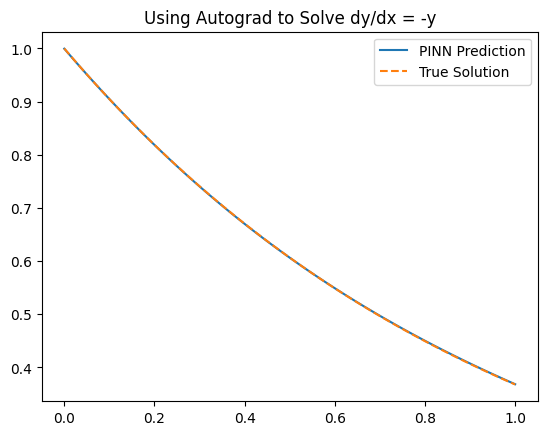

In [ ]:
import matplotlib.pyplot as plt

x_test = torch.linspace(0, 1, 100).reshape(-1, 1)
y_pred = model(x_test).detach().numpy()
y_true = torch.exp(-x_test).numpy()

plt.plot(x_test, y_pred, label="PINN Prediction")
plt.plot(x_test, y_true, '--', label="True Solution")
plt.legend()
plt.title("Using Autograd to Solve dy/dx = -y")
plt.show()

# More PyTorch Features: A Whirlwind Tour

### CNN
2D convolutional layers expect an input of shape $(B, C, H, W)$ or `(batch, channels, height, width)`.

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=20, kernel_size=(5, 5), stride=1, padding=0),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(in_channels=20, out_channels=50, kernel_size=(5, 5), stride=1, padding=0),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Flatten(),
            nn.Linear(800, 500),
            nn.ReLU(),
            nn.Linear(500, 10)
        )

    def forward(self, x_b):
        return self.layers(x_b.view((-1, 1, 28, 28)))

model = CNN().to('cuda')

### LSTM
When constructed using the `batch_first=True` argument, `nn.LSTM`s expect inputs of shape $(B, L, D)$ or `(batch, sequence length, element size)`. We'll interpret the time sequence images as sequence elements, and compute the logits from the last LSTM output (i.e. wait for the LSTM to see the entire image).

In [ ]:
class LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.LSTM = nn.LSTM(input_size=28, hidden_size=64, num_layers=1, batch_first=True)
        self.linear = nn.Linear(64, 10)

    def forward(self, x_b):
        out, _ = self.LSTM(x_b.view((-1, 28, 28)))  # out contains outputs at each iteration over the sequence
        return self.linear(out[:, -1, :])   # only the out at the last iteration has seen the entire image


### `nn.Embedding`
Oftentimes we will have categorical data with too many categories to comfortably convert into one-hot encodings. Examples of this include tokens in NLP and $(x,y)$ positions on a grid. One common way to process this data is to use an `nn.Embedding`, or a table of dense vectors that can be indexed by the categorical data. The dense vectors can be optimized. `nn.Embedding` supports advanced indexing.

In [ ]:
embedding = nn.Embedding(num_embeddings=1000, embedding_dim=64)
print(embedding(torch.tensor(42)).shape)
print(embedding(torch.tensor(42)).requires_grad)
indices = torch.tensor([
    [0, 1, 42, 999],
    [1, 1, 2, 3]
])
print(indices.shape)
print(embedding(indices).shape)

torch.Size([64])
True
torch.Size([2, 4])
torch.Size([2, 4, 64])


If you're interested in NLP, a nice use of `nn.Embedding` and recurrent layers (`nn.GRU`) for natural language translation can be found in [this tutorial](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html).

### `torch.distributions`
Aside from conveniently providing commonly used methods (e.g. density/mass evaluation), one of the main features of this module is the use of the reparameterization trick to facilitate backpropagation through random samples to the underlying distribution parameters (and beyond).

In [ ]:
from torch import distributions
loc = torch.tensor(0., requires_grad=True)
scale = torch.tensor(1., requires_grad=True)
p = distributions.Normal(loc, scale)
x = p.rsample(torch.Size([5]))
print(x)    # grad_fn comes from reparameterization trick
y = -torch.mean(x**2)
y.backward()
print(scale.grad)

tensor([ 0.9733, -0.3250,  0.4241, -0.9791,  1.1398], grad_fn=<AddBackward0>)
tensor(-1.3963)


If we don't use `rsample`, we can't take gradients through the sampling step.

In [ ]:
x = p.sample(torch.Size([5]))
print(x)
y = -torch.sum(x**2)
y.backward()

tensor([-1.1755,  0.5557, -0.1999,  0.5991, -0.4827])


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

# Debugging, Documentation, and Getting Help
Your assignments won't be in Jupyter notebooks, but in Python scripts. This means you won't have the interactivity of cell-based execution, but to the rescue comes `pdb`, the Python Debugger. Use it to

*   set breakpoints in the code to interactively inspect program elements: `import pdb; pdb.set_trace()`
*   automatically start a debugging session when an exception is thrown: `python -m pdb -c continue main.py`

Both will be super, super useful.

When something about PyTorch is confusing you, the first place to look is the [PyTorch documentation](https://https://pytorch.org/docs/stable/index.html). (The author of this tutorial consulted the documentation no fewer than 20 times when making it.) This is often the last place you need to look, but sometimes the [PyTorch forums](https://https://discuss.pytorch.org/) can be helpful, too. (Use the search tool!) And of course, you're always welcome to post on Ed or seek out one of your friendly neighborhood CAs.





---

